# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
from muse_inference import muse, MuseProblem, MuseResult
import numpy as np

In [3]:
θ_true = 1

## With numpy

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = MuseResult()
muse(result, prob, 0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  7%|▋         | 68/1010 [00:00<00:01, 674.53it/s]

 13%|█▎        | 136/1010 [00:00<00:01, 650.86it/s]

 20%|██        | 203/1010 [00:00<00:01, 641.72it/s]

 27%|██▋       | 277/1010 [00:00<00:01, 676.68it/s]

 35%|███▍      | 350/1010 [00:00<00:00, 692.61it/s]

 42%|████▏     | 423/1010 [00:00<00:00, 703.19it/s]

 50%|████▉     | 500/1010 [00:00<00:00, 721.79it/s]

 57%|█████▋    | 573/1010 [00:00<00:00, 714.01it/s]

 64%|██████▍   | 645/1010 [00:00<00:00, 706.91it/s]

 71%|███████   | 716/1010 [00:01<00:00, 699.15it/s]

 78%|███████▊  | 791/1010 [00:01<00:00, 712.96it/s]

 85%|████████▌ | 863/1010 [00:01<00:00, 711.01it/s]

100%|██████████| 1010/1010 [00:01<00:00, 774.17it/s]

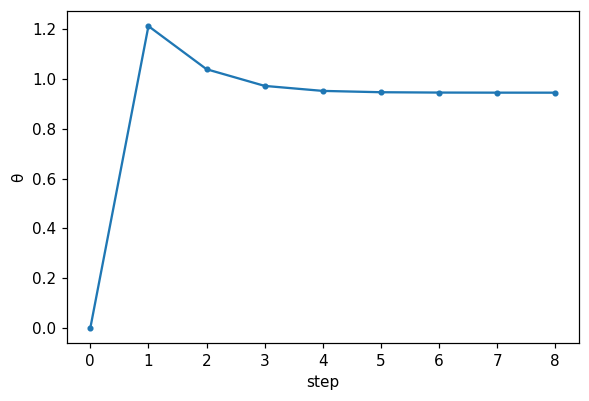

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With Jax

In [8]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem

In [9]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)
    

In [10]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [11]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<32:28,  1.93s/it]

  0%|          | 5/1010 [00:02<05:11,  3.23it/s]

  1%|          | 10/1010 [00:02<02:17,  7.30it/s]

  1%|▏         | 15/1010 [00:02<01:24, 11.81it/s]

  2%|▏         | 19/1010 [00:02<01:03, 15.56it/s]

  2%|▏         | 24/1010 [00:02<00:48, 20.39it/s]

  3%|▎         | 29/1010 [00:02<00:39, 24.96it/s]

  3%|▎         | 34/1010 [00:02<00:33, 28.78it/s]

  4%|▍         | 39/1010 [00:02<00:30, 32.08it/s]

  4%|▍         | 44/1010 [00:02<00:27, 34.88it/s]

  5%|▍         | 49/1010 [00:03<00:26, 36.35it/s]

  5%|▌         | 54/1010 [00:03<00:25, 37.35it/s]

  6%|▌         | 59/1010 [00:03<00:24, 38.64it/s]

  6%|▋         | 64/1010 [00:03<00:23, 39.94it/s]

  7%|▋         | 69/1010 [00:03<00:23, 40.67it/s]

  7%|▋         | 74/1010 [00:03<00:22, 40.76it/s]

  8%|▊         | 79/1010 [00:03<00:23, 39.78it/s]

  8%|▊         | 84/1010 [00:03<00:23, 39.58it/s]

  9%|▉         | 89/1010 [00:04<00:22, 40.15it/s]

  9%|▉         | 94/1010 [00:04<00:22, 40.60it/s]

 10%|▉         | 99/1010 [00:04<00:22, 40.54it/s]

 10%|█         | 104/1010 [00:06<02:13,  6.80it/s]

 11%|█         | 108/1010 [00:06<01:44,  8.63it/s]

 11%|█         | 113/1010 [00:06<01:18, 11.46it/s]

 12%|█▏        | 118/1010 [00:06<01:00, 14.82it/s]

 12%|█▏        | 123/1010 [00:06<00:48, 18.38it/s]

 13%|█▎        | 128/1010 [00:07<00:39, 22.17it/s]

 13%|█▎        | 133/1010 [00:07<00:33, 26.00it/s]

 14%|█▎        | 138/1010 [00:07<00:29, 29.62it/s]

 14%|█▍        | 143/1010 [00:07<00:26, 32.51it/s]

 15%|█▍        | 148/1010 [00:07<00:24, 34.95it/s]

 15%|█▌        | 153/1010 [00:07<00:23, 36.94it/s]

 16%|█▌        | 158/1010 [00:07<00:22, 38.25it/s]

 16%|█▌        | 163/1010 [00:07<00:21, 39.61it/s]

 17%|█▋        | 168/1010 [00:08<00:21, 39.44it/s]

 17%|█▋        | 173/1010 [00:08<00:21, 38.37it/s]

 18%|█▊        | 177/1010 [00:08<00:22, 37.85it/s]

 18%|█▊        | 181/1010 [00:08<00:21, 37.73it/s]

 18%|█▊        | 186/1010 [00:08<00:21, 39.13it/s]

 19%|█▉        | 191/1010 [00:08<00:20, 39.67it/s]

 19%|█▉        | 196/1010 [00:08<00:20, 40.25it/s]

 20%|█▉        | 201/1010 [00:08<00:20, 39.85it/s]

 20%|██        | 206/1010 [00:09<00:23, 33.78it/s]

 21%|██        | 210/1010 [00:09<00:22, 35.08it/s]

 21%|██▏       | 215/1010 [00:09<00:21, 36.31it/s]

 22%|██▏       | 220/1010 [00:09<00:20, 37.87it/s]

 22%|██▏       | 224/1010 [00:09<00:20, 37.93it/s]

 23%|██▎       | 229/1010 [00:09<00:19, 39.07it/s]

 23%|██▎       | 234/1010 [00:09<00:19, 40.14it/s]

 24%|██▎       | 239/1010 [00:09<00:18, 40.63it/s]

 24%|██▍       | 244/1010 [00:09<00:18, 40.97it/s]

 25%|██▍       | 249/1010 [00:10<00:18, 41.57it/s]

 25%|██▌       | 254/1010 [00:10<00:18, 41.42it/s]

 26%|██▌       | 259/1010 [00:10<00:18, 41.40it/s]

 26%|██▌       | 264/1010 [00:10<00:17, 41.60it/s]

 27%|██▋       | 269/1010 [00:10<00:17, 42.01it/s]

 27%|██▋       | 274/1010 [00:10<00:17, 41.88it/s]

 28%|██▊       | 279/1010 [00:10<00:17, 42.02it/s]

 28%|██▊       | 284/1010 [00:10<00:17, 41.38it/s]

 29%|██▊       | 289/1010 [00:11<00:17, 42.04it/s]

 29%|██▉       | 294/1010 [00:11<00:16, 42.37it/s]

 30%|██▉       | 299/1010 [00:11<00:16, 42.27it/s]

 30%|███       | 304/1010 [00:11<00:16, 42.00it/s]

 31%|███       | 311/1010 [00:11<00:14, 48.31it/s]

 31%|███▏      | 318/1010 [00:11<00:13, 52.14it/s]

 32%|███▏      | 325/1010 [00:11<00:12, 55.01it/s]

 33%|███▎      | 331/1010 [00:11<00:12, 55.88it/s]

 33%|███▎      | 337/1010 [00:11<00:11, 56.79it/s]

 34%|███▍      | 344/1010 [00:12<00:11, 58.60it/s]

 35%|███▍      | 351/1010 [00:12<00:11, 59.90it/s]

 35%|███▌      | 358/1010 [00:12<00:10, 60.87it/s]

 36%|███▌      | 365/1010 [00:12<00:10, 61.48it/s]

 37%|███▋      | 372/1010 [00:12<00:10, 61.56it/s]

 38%|███▊      | 379/1010 [00:12<00:10, 61.22it/s]

 38%|███▊      | 386/1010 [00:12<00:10, 61.37it/s]

 39%|███▉      | 393/1010 [00:12<00:09, 62.30it/s]

 40%|███▉      | 400/1010 [00:12<00:09, 63.10it/s]

 40%|████      | 407/1010 [00:13<00:09, 62.11it/s]

 41%|████      | 414/1010 [00:13<00:09, 62.90it/s]

 42%|████▏     | 421/1010 [00:13<00:09, 63.21it/s]

 42%|████▏     | 428/1010 [00:13<00:09, 62.41it/s]

 43%|████▎     | 435/1010 [00:13<00:09, 61.56it/s]

 44%|████▍     | 442/1010 [00:13<00:09, 62.54it/s]

 44%|████▍     | 449/1010 [00:13<00:09, 61.88it/s]

 45%|████▌     | 456/1010 [00:13<00:08, 62.07it/s]

 46%|████▌     | 463/1010 [00:13<00:08, 61.49it/s]

 47%|████▋     | 470/1010 [00:14<00:08, 62.12it/s]

 47%|████▋     | 477/1010 [00:14<00:08, 62.35it/s]

 48%|████▊     | 484/1010 [00:14<00:08, 62.22it/s]

 49%|████▊     | 491/1010 [00:14<00:08, 62.26it/s]

 49%|████▉     | 498/1010 [00:14<00:08, 62.46it/s]

 50%|█████     | 505/1010 [00:14<00:08, 62.78it/s]

 51%|█████     | 512/1010 [00:14<00:08, 59.98it/s]

 51%|█████▏    | 519/1010 [00:14<00:08, 60.24it/s]

 52%|█████▏    | 526/1010 [00:15<00:07, 60.68it/s]

 53%|█████▎    | 533/1010 [00:15<00:07, 61.33it/s]

 53%|█████▎    | 540/1010 [00:15<00:07, 61.17it/s]

 54%|█████▍    | 547/1010 [00:15<00:07, 61.62it/s]

 55%|█████▍    | 554/1010 [00:15<00:07, 62.00it/s]

 56%|█████▌    | 561/1010 [00:15<00:07, 61.87it/s]

 56%|█████▌    | 568/1010 [00:15<00:07, 61.37it/s]

 57%|█████▋    | 575/1010 [00:15<00:07, 60.44it/s]

 58%|█████▊    | 582/1010 [00:15<00:07, 60.04it/s]

 58%|█████▊    | 589/1010 [00:16<00:06, 60.50it/s]

 59%|█████▉    | 596/1010 [00:16<00:06, 61.18it/s]

 60%|█████▉    | 603/1010 [00:16<00:06, 61.36it/s]

 60%|██████    | 610/1010 [00:16<00:06, 59.37it/s]

 61%|██████    | 617/1010 [00:16<00:06, 60.37it/s]

 62%|██████▏   | 624/1010 [00:16<00:06, 61.07it/s]

 62%|██████▏   | 631/1010 [00:16<00:06, 61.16it/s]

 63%|██████▎   | 638/1010 [00:16<00:06, 60.07it/s]

 64%|██████▍   | 645/1010 [00:16<00:05, 61.27it/s]

 65%|██████▍   | 652/1010 [00:17<00:05, 62.76it/s]

 65%|██████▌   | 659/1010 [00:17<00:05, 63.19it/s]

 66%|██████▌   | 666/1010 [00:17<00:05, 63.89it/s]

 67%|██████▋   | 673/1010 [00:17<00:05, 62.95it/s]

 67%|██████▋   | 680/1010 [00:17<00:05, 63.19it/s]

 68%|██████▊   | 687/1010 [00:17<00:05, 62.59it/s]

 69%|██████▊   | 694/1010 [00:17<00:05, 62.52it/s]

 69%|██████▉   | 701/1010 [00:17<00:05, 61.69it/s]

 70%|███████   | 708/1010 [00:17<00:05, 60.07it/s]

 71%|███████   | 715/1010 [00:18<00:04, 60.31it/s]

 71%|███████▏  | 722/1010 [00:18<00:04, 61.01it/s]

 72%|███████▏  | 729/1010 [00:18<00:04, 61.05it/s]

 73%|███████▎  | 736/1010 [00:18<00:04, 60.73it/s]

 74%|███████▎  | 743/1010 [00:18<00:04, 61.50it/s]

 74%|███████▍  | 750/1010 [00:18<00:04, 60.67it/s]

 75%|███████▍  | 757/1010 [00:18<00:04, 59.45it/s]

 76%|███████▌  | 763/1010 [00:18<00:04, 57.87it/s]

 76%|███████▌  | 769/1010 [00:18<00:04, 57.46it/s]

 77%|███████▋  | 776/1010 [00:19<00:03, 59.54it/s]

 78%|███████▊  | 783/1010 [00:19<00:03, 60.52it/s]

 78%|███████▊  | 790/1010 [00:19<00:03, 60.07it/s]

 79%|███████▉  | 797/1010 [00:19<00:03, 60.72it/s]

 80%|███████▉  | 804/1010 [00:19<00:03, 61.04it/s]

 80%|████████  | 811/1010 [00:19<00:03, 60.56it/s]

 81%|████████  | 818/1010 [00:19<00:03, 61.35it/s]

 82%|████████▏ | 825/1010 [00:19<00:02, 61.77it/s]

 82%|████████▏ | 832/1010 [00:20<00:02, 62.53it/s]

 83%|████████▎ | 839/1010 [00:20<00:02, 62.23it/s]

 84%|████████▍ | 846/1010 [00:20<00:02, 62.56it/s]

 84%|████████▍ | 853/1010 [00:20<00:02, 61.66it/s]

 85%|████████▌ | 860/1010 [00:20<00:02, 62.42it/s]

 86%|████████▌ | 867/1010 [00:20<00:02, 64.25it/s]

 87%|████████▋ | 874/1010 [00:20<00:02, 64.58it/s]

 87%|████████▋ | 881/1010 [00:20<00:01, 66.06it/s]

 88%|████████▊ | 888/1010 [00:20<00:01, 63.88it/s]

 89%|████████▊ | 895/1010 [00:20<00:01, 64.15it/s]

 89%|████████▉ | 902/1010 [00:21<00:01, 65.02it/s]

 90%|█████████ | 909/1010 [00:21<00:01, 65.12it/s]

100%|██████████| 1010/1010 [00:21<00:00, 47.62it/s]

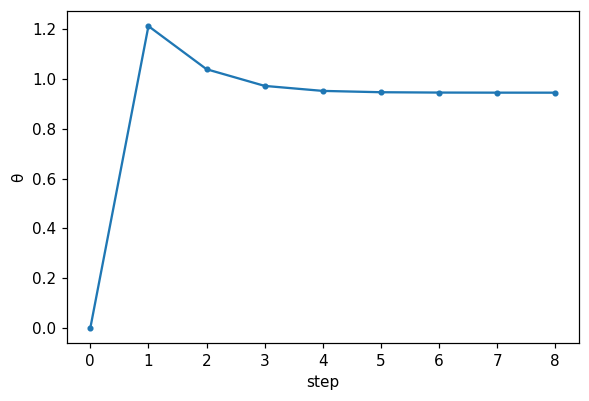

In [12]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [13]:
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

In [14]:
def gen_funnel(x=None, θ=None):
    with pm.Model() as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true)).prior.x[0,0]
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)
prob.x = x_obs

In [15]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  6%|▌         | 57/1010 [00:00<00:01, 561.35it/s]

 11%|█▏        | 114/1010 [00:03<00:32, 27.27it/s]

 17%|█▋        | 174/1010 [00:03<00:16, 49.41it/s]

 21%|██▏       | 215/1010 [00:07<00:32, 24.59it/s]

 27%|██▋       | 274/1010 [00:07<00:18, 39.40it/s]

 31%|███       | 312/1010 [00:10<00:29, 23.31it/s]

 37%|███▋      | 374/1010 [00:10<00:17, 36.86it/s]

 41%|████      | 411/1010 [00:14<00:26, 22.97it/s]

 47%|████▋     | 473/1010 [00:14<00:15, 35.70it/s]

 50%|█████     | 510/1010 [00:17<00:21, 22.91it/s]

 57%|█████▋    | 573/1010 [00:17<00:12, 35.52it/s]

 60%|██████    | 611/1010 [00:21<00:17, 23.06it/s]

 67%|██████▋   | 674/1010 [00:21<00:09, 35.48it/s]

 70%|███████   | 712/1010 [00:24<00:12, 23.34it/s]

 77%|███████▋  | 774/1010 [00:25<00:06, 35.56it/s]

 80%|████████  | 811/1010 [00:28<00:08, 23.09it/s]

 86%|████████▋ | 873/1010 [00:28<00:03, 35.26it/s]

 90%|█████████ | 910/1010 [00:32<00:04, 23.01it/s]

 96%|█████████▌| 972/1010 [00:32<00:01, 35.17it/s]

100%|██████████| 1010/1010 [00:32<00:00, 31.37it/s]

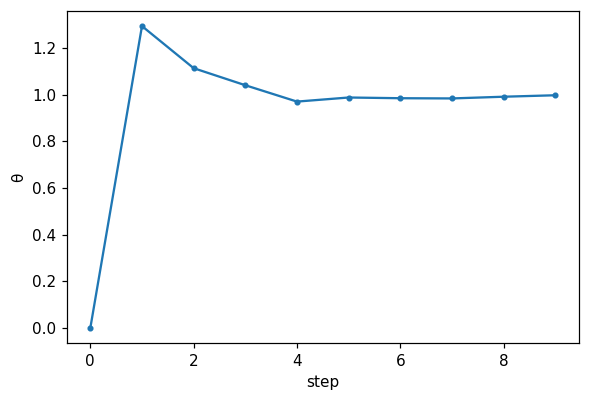

In [16]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");